## Edgar Galindo
## Kevin Parton

### Adult Census Income Prediction


##### importing libraries

In [2]:
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [3]:
%matplotlib inline

In [167]:
# reading in the csv file and printing out every 50 entries
df = pd.read_csv('adult.csv')
# df[::50]

In [168]:
df.shape

(32561, 15)

In [158]:
#get a list of all of the feature names
feature_cols = [x for x in df if x != 'income']
print(feature_cols)

['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']


In [159]:
# This section is to see how many missing data samples each field is missing. As we can see theyre all 0.
# This data set has a '?' for missing values.
 
d = list(map(lambda x: df[x].isnull().sum(), df))

for (col, tot) in zip(feature_cols, d):
    print(col, ': ', tot)

age :  0
workclass :  0
fnlwgt :  0
education :  0
education.num :  0
marital.status :  0
occupation :  0
relationship :  0
race :  0
sex :  0
capital.gain :  0
capital.loss :  0
hours.per.week :  0
native.country :  0


In [155]:
# This section is to determine the amount of missing data that we should tolerate per row and drop the row if met.

startTime = time()
total_removed = 0
count = 0
print('Before removing items: ', df.shape[0])



# # this is a much cleaner way to count the ? and drop rows but takes much more time to do
# for row in range (0, df.shape[0]):
#     if df.ix[row].to_string().count('?') >= 3:
#         df = df.drop(row)
#         total_removed += 1

# same thing as the top one but a lot quicker
for row in range (0, df.shape[0]):
    for r in df.ix[row]:
        if r == '?':
            count += 1
    if count >= 2:
        df = df.drop(row)
        total_removed += 1
    count = 0
    
print('After removing items: ', df.shape[0])
print('Total removed: ', total_removed)
print('Total time: %.2f'% (time()-startTime))

Before removing items:  32561
After removing items:  30725
Total removed:  1836
Total time: 20.09


In [156]:
# Resetting the indices of the data set.
df = df.reset_index()

Before one hot encoding need to impute the data and get rid of some of the data samples if they are missing

In [87]:
# this is to return a list of all of the unique words in a column, input is the desired column

def get_unique_words(col):
    uniqueWords = []
    for x in(col):
        if x not in uniqueWords:
            uniqueWords.append(x)
#     print(uniqueWords)
    return(uniqueWords)

In [88]:
# this is to check and see which columns have missing information and how many are missing

def count_missing():
    for k in df:
        print('%s: %d'% (k, df[k].to_string().count('?')))
    

In [143]:
#this is to go through the information and insert other.column where there is a question mark
def impute_unknown(data):
    for x in data.columns:
        data[x] = data[x].replace('?', 'other.'+x)
    return data
    

In [160]:
# print('Before imputation: ',count_missing())
df = impute_unknown(df)
# print('\n\nAfter imputation: ',count_missing())

In [161]:
# aplitting from features and training

x = df[feature_cols]
y = df['income']

# x.head()

In [41]:
#To find out if a column has numeric values or not

def is_numeric(data, features):
    feature_numeric_dict = {}
    for col in features:
        temp = 0
        for i in range(x.shape[0]):
            temp = data[col][i]
            if str(temp).isdigit() == True:
                continue
            elif  str(temp).isdigit() == False:
                feature_numeric_dict[col] = ['Non numeric', False]
        if (col in feature_numeric_dict) == False:
            feature_numeric_dict[col] = ['Numeric', True]
    return feature_numeric_dict


In [84]:
# We are making a dictionary that will hold a label of numeric or non numeric as keys and the 
# features that corresponds to either key.
#


numeric_dict = is_numeric(x, feature_cols)

print(numeric_dict.keys())
print()
print()
print(numeric_dict.values())
print()
print()


non_numeric_features = []
numeric_features = []

for feature, value in numeric_dict.items():
    if value == ['Non numeric', False]:
        non_numeric_features.append(feature)
    else:
        numeric_features.append(feature)
        
        
print('non numeric features')   
print(non_numeric_features)
print()
print('numeric features')
print(numeric_features)
print()
print()

string_feature_values = []

# finds values for the categorical features
# 

for item in non_numeric_features:
    string_feature_values.append(get_unique_words(x[item]))
  
print('string values')
print('-----------------------------------------------------------------------------------------------------')
for val in string_feature_values:
    print(val)
    print()
    print()


# non_numeric_features => array of features with non numeric vales
# string_feature_values => possible values in that column

dict_keys(['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'])


dict_values([['Numeric', True], ['Non numeric', False], ['Numeric', True], ['Non numeric', False], ['Numeric', True], ['Non numeric', False], ['Non numeric', False], ['Non numeric', False], ['Non numeric', False], ['Non numeric', False], ['Numeric', True], ['Numeric', True], ['Numeric', True], ['Non numeric', False]])


non numeric features
['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

numeric features
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


string values
-----------------------------------------------------------------------------------------------------
['other.workclass', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'Without-pay', 

In [85]:
uinque_words_country = get_unique_words(x['native.country'])
# print(uinque_words_country)

In [87]:
# dataframe of numeric features
x_num = df[numeric_features]

# dataframe of non numeric features
x_non_num = df[non_numeric_features]

In [88]:
x_num.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40


In [89]:
#converting values in native.country to integer values

def numerical_country(x):
    if x == 'United-States':
        return 41
    elif x == 'other.native.country':
        return 40
    elif x == 'Mexico':
        return 39
    elif x == 'Greece':
        return 38
    elif x == 'Vietnam':
        return 37
    elif x == 'China':
        return 36
    elif x == 'Taiwan':
        return 35
    elif x == 'India':
        return 34
    elif x == 'Philippines':
        return 33
    elif x == 'Trinadad&Tobago':
        return 32
    elif x == 'Canada':
        return 31
    elif x == 'South':
        return 30
    elif x == 'Holand-Netherlands':
        return 29
    elif x == 'Puerto-Rico':
        return 28
    elif x == 'Poland':
        return 27
    elif x == 'Iran':
        return 26
    elif x == 'England':
        return 25
    elif x == 'Germany':
        return 24
    elif x == 'Italy':
        return 23
    elif x == 'Japan':
        return 22
    elif x == 'Hong':
        return 21
    elif x == 'Honduras':
        return 20
    elif x == 'Cuba':
        return 19
    elif x == 'Ireland':
        return 18
    elif x == 'Cambodia':
        return 17
    elif x == 'Peru':
        return 16
    elif x == 'Nicaragua':
        return 15
    elif x == 'Dominican-Republic':
        return 14
    elif x == 'Haiti':
        return 13
    elif x == 'El-Salvador':
        return 12
    elif x == 'Hungary':
        return 11
    elif x == 'Columbia':
        return 10
    elif x == 'Guatemala':
        return 9
    elif x == 'Jamaica':
        return 8
    elif x == 'Ecuador':
        return 7
    elif x == 'France':
        return 6
    elif x == 'Yugoslavia':
        return 5
    elif x == 'Scotland':
        return 4
    elif x == 'Portugal':
        return 3
    elif x == 'Laos':
        return 2
    elif x == 'Thailand':
        return 1
    elif x == 'Outlying-US(Guam-USVI-etc)':
        return 0
    
    
    

In [90]:
#converting values in native.country to integer values
df['native.country_num'] = df['native.country'].apply(numerical_country)

new_country = df['native.country_num']

new_country.head()

0    41
1    41
2    41
3    41
4    41
Name: native.country_num, dtype: int64

In [91]:
#converting values in marital.status to integer values
def numerical_marital_status(x):
    if x == 'Never-married':
        return 6
    elif x == 'Married-AF-spouse':
        return 5
    elif x == 'Married-civ-spouse':
        return 4
    elif x == 'Married-spouse-absent':
        return 3
    elif x == 'Widowed':
        return 2
    elif x == 'Separated':
        return 1
    elif x == 'Divorced':
        return 0
    

In [92]:
#converting values in marital.status to integer values
df['marital.status_num'] = df['marital.status'].apply(numerical_marital_status)

new_marital = df['marital.status_num']

new_marital.head()

0    2
1    2
2    2
3    0
4    1
Name: marital.status_num, dtype: int64

In [93]:
#converting values in relationship to integer values
def numerical_relationship(x):
    if x == 'Unmarried':
        return 5
    elif x == 'Husband':
        return 4
    elif x == 'Other-relative':
        return 3
    elif x == 'Wife':
        return 2
    elif x == 'Own-child':
        return 1
    elif x == 'Not-in-family':
        return 0

In [94]:
#converting values in relationship to integer values
df['relationship_num'] = df['relationship'].apply(numerical_relationship)

new_relationship = df['relationship_num']

new_relationship.head()

0    0
1    0
2    5
3    5
4    1
Name: relationship_num, dtype: int64

In [95]:
#converting values in workclass to integer values
def numerical_workclass(x):
    if x == 'Self-emp-inc':
        return 8
    elif x == 'Private':
        return 7
    elif x == 'Federal-gov':
        return 6
    elif x == 'Self-emp-not-inc':
        return 5
    elif x == 'State-gov':
        return 4
    elif x == 'Local-gov':
        return 3
    elif x == 'other.workclass':
        return 2
    elif x == 'Without-pay':
        return 1
    elif x == 'Never-worked':
        return 0
   
    

In [96]:
#converting values in workclass to integer values
df['workclass_num'] = df['workclass'].apply(numerical_workclass)

new_workclass = df['workclass_num']

new_workclass.head()

0    2
1    7
2    2
3    7
4    7
Name: workclass_num, dtype: int64

In [97]:
#converting values in race to integer values
def numerical_race(x):
    if x == 'White':
        return 4
    elif x == 'Asian-Pac-Islander':
        return 3
    elif x == 'Other':
        return 2
    elif x == 'Black':
        return 1
    elif x == 'Amer-Indian-Eskimo':
        return 0
    

In [98]:
#converting values in workclass to integer values
df['race_num'] = df['race'].apply(numerical_race)

new_race = df['race_num']

new_race.head()

0    4
1    4
2    1
3    4
4    4
Name: race_num, dtype: int64

In [99]:
#converting values in occupation to integer values
def numerical_occupation(x):
    if x == 'Exec-managerial':
        return 14
    elif x == 'Prof-specialty':
        return 13
    elif x == 'Sales':
        return 12
    elif x == 'Priv-house-serv':
        return 11
    elif x == 'Protective-serv':
        return 10
    elif x == 'Tech-support':
        return 9
    elif x == 'Adm-clerical':
        return 8
    elif x == 'Armed-Forces':
        return 7
    elif x == 'Other-service':
        return 6
    elif x == 'other.occupation':
        return 5
    elif x == 'Machine-op-inspct':
        return 4
    elif x == 'Craft-repair':
        return 3
    elif x == 'Transport-moving':
        return 2
    elif x == 'Handlers-cleaners':
        return 1
    elif x == 'Farming-fishing':
        return 0

In [100]:
#converting values in occupation to integer values
df['occupation_num'] = df['occupation'].apply(numerical_occupation)

new_occupation = df['occupation_num']

new_occupation.head()

0     5
1    14
2     5
3     4
4    13
Name: occupation_num, dtype: int64

In [101]:
#converting values in sex to integer values
def numerical_sex(x):
    if x == 'Male':
        return 1
    elif x == 'Female':
        return 0
    

In [102]:
#converting values in sex to integer values
df['sex_num'] = df['sex'].apply(numerical_sex)

new_sex = df['sex_num']

new_sex.head()

0    0
1    0
2    0
3    0
4    0
Name: sex_num, dtype: int64

In [103]:
#converting values in education to integer values
def numerical_education(x):
    if x == 'Prof-school':
        return 15
    elif x == 'Masters':
        return 14
    elif x == 'Doctorate':
        return 13
    elif x == 'Bachelors':
        return 12
    elif x == 'Assoc-acdm':
        return 11
    elif x == 'Assoc-voc':
        return 10
    elif x == 'Some-college':
        return 9
    elif x == 'HS-grad':
        return 8
    elif x == '12th':
        return 7
    elif x == '11th':
        return 6
    elif x == '10th':
        return 5
    elif x == '9th': 
        return 4
    elif x == '7th-8th': 
        return 3
    elif x == '5th-6th': 
        return 2
    elif x == '1st-4th': 
        return 1
    elif x == 'Preschool': 
        return 0
    

In [104]:
#converting values in education to integer values
df['education_num'] = df['education'].apply(numerical_education)

In [105]:
new_education = df['education_num']

new_education.head()

0    8
1    8
2    9
3    3
4    9
Name: education_num, dtype: int64

In [106]:
print(len(non_numeric_features))
print(len(numeric_features))
print()
print()
for i in range(len(string_feature_values)):
    print(len(string_feature_values[i]))
    

8
6


9
16
7
15
6
5
2
42


In [107]:
# Here we will plot features against income
# Feature data that is not numeric will be made numeric in order to plot it agianst income

In [108]:
def numerical_label(x):
    if x == '>50K':
        return 1
    elif x == '<=50K':
        return 0


In [109]:
df['income_num'] = df['income'].apply(numerical_label)

In [110]:
z = df['income_num']

z.tail()

32529    0
32530    0
32531    1
32532    0
32533    0
Name: income_num, dtype: int64

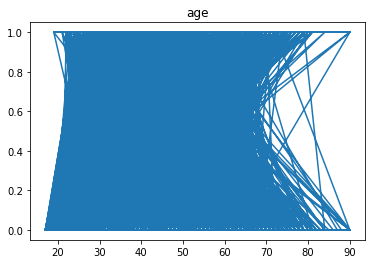

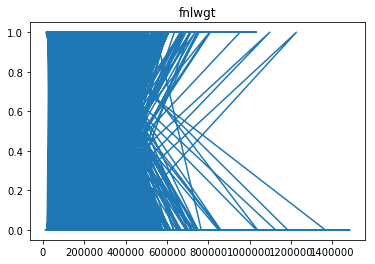

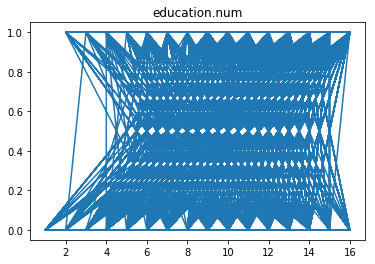

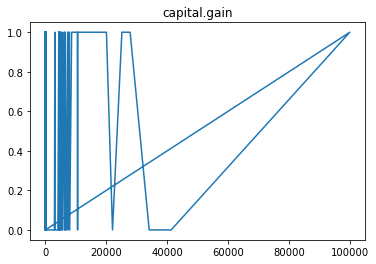

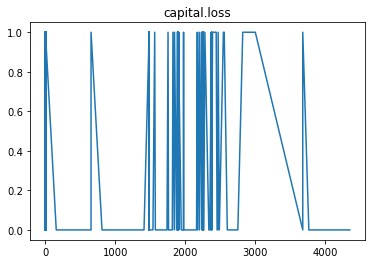

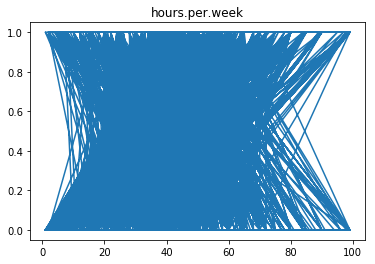

In [111]:
#making scatter plots of features against the income label
plt.figure()

for item in x_num:
    plt.plot(x_num[item], z)
    plt.title(item)
    plt.show()
    

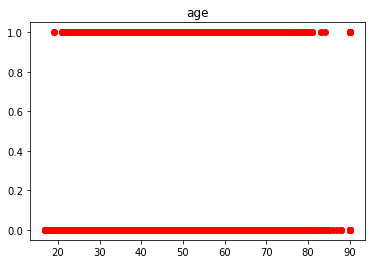

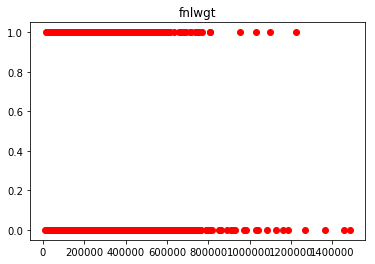

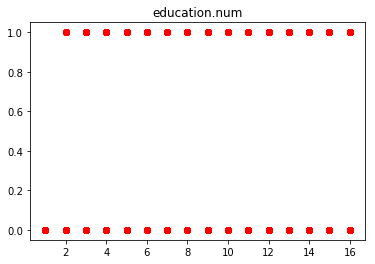

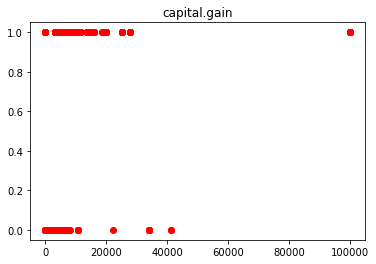

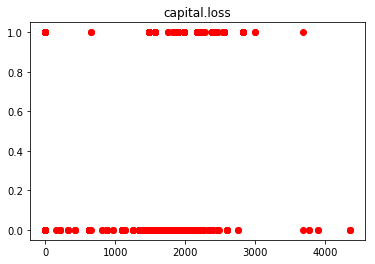

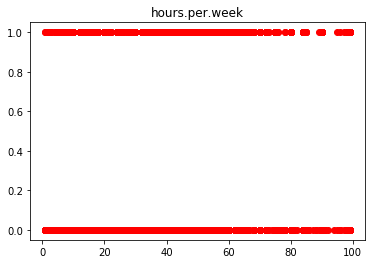

In [112]:
#making scatter plots of features against the income label
plt.figure()

for item in x_num:
    plt.plot(x_num[item], z, 'ro')
    plt.title(item)
    plt.show()

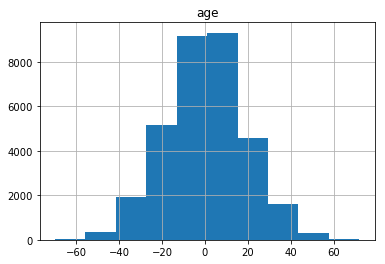

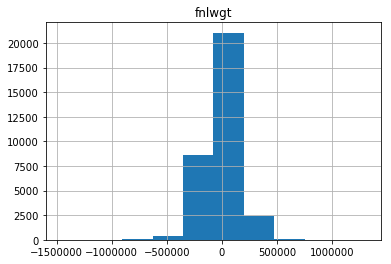

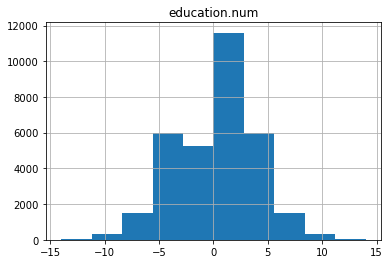

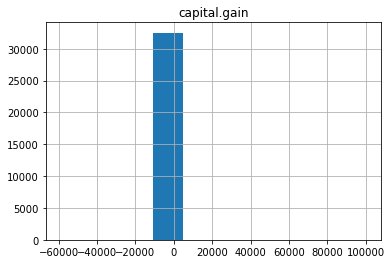

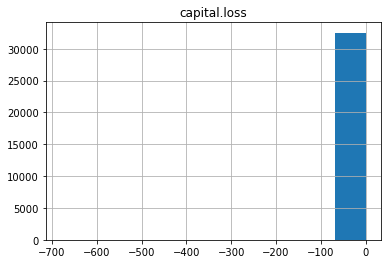

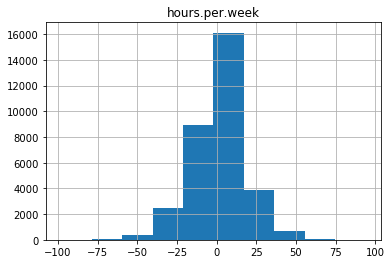

In [113]:
#making histograms of each feature
plt.figure()

for item in x_num:
    x_num[item].diff().hist()
    plt.title(item)
    plt.show()

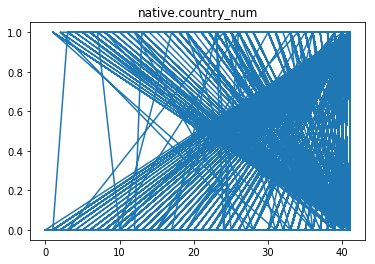

In [114]:
#making scatter plots of native.country against the income label
plt.figure()

plt.plot(new_country, z)
plt.title('native.country_num')
plt.show()


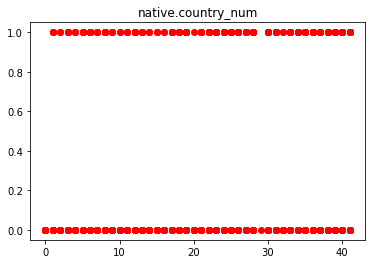

In [115]:
plt.figure()

plt.plot(new_country, z, 'ro')
plt.title('native.country_num')
plt.show()


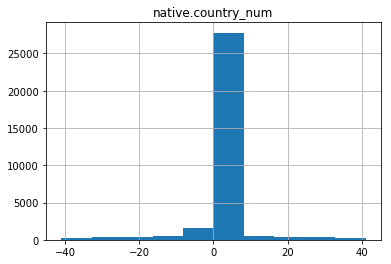

In [116]:
#making histograms of native.country feature
plt.figure()

new_country.diff().hist()
plt.title('native.country_num')
plt.show()

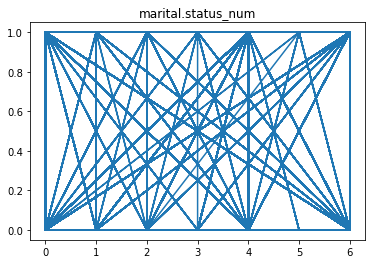

In [117]:
plt.figure()

plt.plot(new_marital, z)
plt.title('marital.status_num')
plt.show()

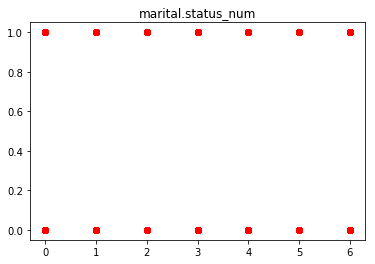

In [118]:
#making scatter plots of marital.status against the income label
plt.figure()

plt.plot(new_marital, z, 'ro')
plt.title('marital.status_num')
plt.show()

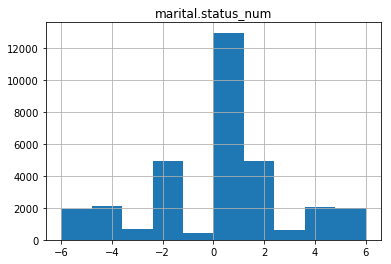

In [119]:
#histogram of marital.status
plt.figure()

new_marital.diff().hist()
plt.title('marital.status_num')
plt.show()

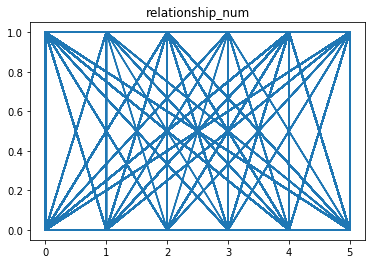

In [120]:
#making scatter plots of relationship against the income label
plt.figure()

plt.plot(new_relationship, z)
plt.title('relationship_num')
plt.show()

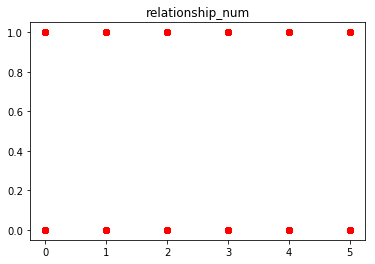

In [121]:
plt.figure()

plt.plot(new_relationship, z, 'ro')
plt.title('relationship_num')
plt.show()

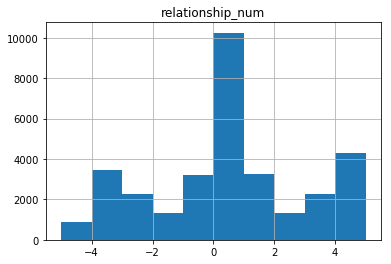

In [122]:
#making histogram of relationship
plt.figure()

new_relationship.diff().hist()
plt.title('relationship_num')
plt.show()

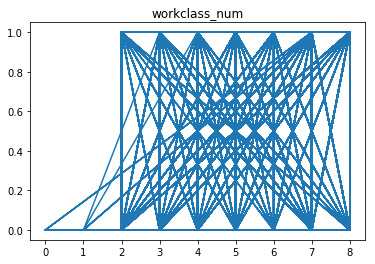

In [123]:
#making scatter plots of workclass against the income label
plt.figure()

plt.plot(new_workclass, z)
plt.title('workclass_num')
plt.show()

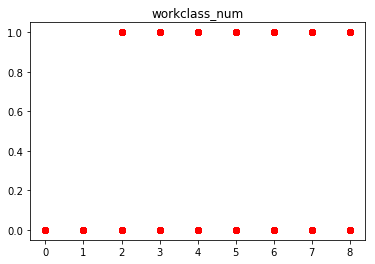

In [124]:
plt.figure()

plt.plot(new_workclass, z, 'ro')
plt.title('workclass_num')
plt.show()

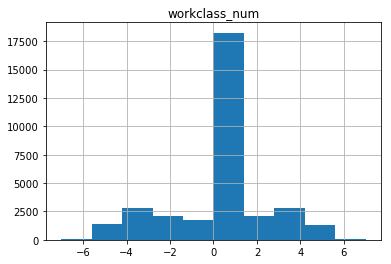

In [125]:
#making histogram of workclass
plt.figure()

new_workclass.diff().hist()
plt.title('workclass_num')
plt.show()

In [92]:
# This returns a list of the columns that contain string values
def get_categorical_features(data, features):
    cat_features = []
    for col in features:
        try:
            if data[col][0].dtype.type is np.str_:
                break
        except:
            cat_features.append(col)
            
#     print(cat_features)
    return cat_features

In [93]:
#returns a dataframe with all of the categorical features converted to numerical.
def one_hot_encoding(data, features):
    encoded_dict = {}
    count = 0
    categorical_features = get_categorical_features(data, features)
    for col in categorical_features:
        unique_words = get_unique_words(data[col])
        for word in unique_words:
            encoded_arr = []
            for item in data[col]:
                if item == word:
                    encoded_arr.append(1)
                else:
                    encoded_arr.append(0)
            encoded_dict[word] = encoded_arr
        data.drop([col], axis=1, inplace=True)
    new_df = pd.DataFrame(encoded_dict)
    new_df.join(data)
    return new_df

In [162]:
# Get rid of all of the categorical features
print('Before one hot encoding: ',x.shape)
x = one_hot_encoding(x, feature_cols)
print('After: ', x.shape)

Before one hot encoding:  (32561, 14)


/Users/edgar/Software/Jupyter/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


After:  (32561, 102)


In [46]:
# at this point the x is now good workable data
# x are the features
# y are the labels
x.mean()

10th                    0.028654
11th                    0.036086
12th                    0.013298
1st-4th                 0.005160
5th-6th                 0.010227
7th-8th                 0.019840
9th                     0.015786
Adm-clerical            0.115783
Amer-Indian-Eskimo      0.009551
Armed-Forces            0.000276
Asian-Pac-Islander      0.031909
Assoc-acdm              0.032769
Assoc-voc               0.042443
Bachelors               0.164461
Black                   0.095943
Cambodia                0.000584
Canada                  0.003716
China                   0.002303
Columbia                0.001812
Craft-repair            0.125887
Cuba                    0.002918
Divorced                0.136452
Doctorate               0.012684
Dominican-Republic      0.002150
Ecuador                 0.000860
El-Salvador             0.003255
England                 0.002764
Exec-managerial         0.124873
Farming-fishing         0.030527
Federal-gov             0.029483
          

In [95]:
# This funciton below is to scale the data in a range from -1 to 1
def scale_data_neg(num):
    maxNum = num.max()
    minNum = num.min()
    reList = []
    for n in num:
        reList.append((-1 + ((n - minNum)*(1 -(-1))/(maxNum - minNum))))
    return reList

def scale_data_zero(num):
    maxNum = num.max()
    minNum = num.min()
    reList = []
    for n in num:
        reList.append((0 + ((n - minNum)*(1 -(0))/(maxNum - minNum))))
    return reList

# This function is to convert the label to either 0 and 1
def to_num(num):
    if num == '<=50K':
        return 0
    else:
        return 1

In [163]:
# scaling the data

x_scaled_neg_one = x.apply(scale_data_neg)
x_scaled_zero = x.apply(scale_data_zero)

In [164]:
# converting the labels to numerical values
y = y.apply(to_num)

In [149]:
#splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled_neg_one, y, test_size=0.2, random_state=2)

### Below I am testing logistic regression and decision tree

In [123]:
#instantiate and use logistic regression and decicion tree with the data set after one hot encoding has been done.

my_log_regression = LogisticRegression()
my_decision_tree = DecisionTreeClassifier()

#train the logistic and decision tree objects

my_log_regression.fit(x_train, y_train)
my_decision_tree.fit(x_train, y_train)

#test the prediction of both of these objects

predict_LR = my_log_regression.predict(x_test)
predict_DT = my_decision_tree.predict(x_test)

# print(yPredictLR)
# print(yPredictDT)

#get the accuracy score of both of them and print it out.

score_LR = accuracy_score(y_test, predict_LR)
score_DR = accuracy_score(y_test, predict_DT)

print('Using logistic regression: ',score_LR)
print('Using decision tree classifier: ',score_DR)

Using logistic regression:  0.831258644537
Using decision tree classifier:  0.813124327647


In the section above the best accuracy achieved was 83% accuracy with the data normalized between -1 and 1. This yielded very slightly better results than normalized between 0 and 1.

In [124]:
# Using bagging and ada boost

my_bag = BaggingClassifier(n_estimators=21, bootstrap=True, bootstrap_features=True, random_state=2)
my_adaBoost = AdaBoostClassifier(n_estimators=15, random_state=2)

# training the models
my_bag.fit(x_train, y_train)
my_adaBoost.fit(x_train, y_train)

# testing the models
my_bag_predict = my_bag.predict(x_test)
my_adaBoost_predict = my_adaBoost.predict(x_test)

# getting their accuracy
score_bag = accuracy_score(y_test, my_bag_predict)
score_ada = accuracy_score(y_test, my_adaBoost_predict)

print('Using Bagging: ',score_bag)
print('Using AdaBoost: ',score_ada)

Using Bagging:  0.82587982173
Using AdaBoost:  0.821115721531


In [165]:
start_time = time()
bagging = BaggingClassifier(n_estimators=21, bootstrap=True, bootstrap_features=True, random_state=2)

accuracyListBagging = cross_val_score(bagging, x_scaled_neg_one, y, cv=10, scoring='accuracy')

print(accuracyListBagging)
print(accuracyListBagging.mean())
print('Total time: %.2f'% (time()-start_time))

[ 0.8326681   0.84060197  0.82340295  0.81726044  0.82493857  0.81296069
  0.84060197  0.83077396  0.83323096  0.82248157]
0.827892117073
Total time: 37.47


In [166]:
start_time = time()
adaBoost = AdaBoostClassifier(n_estimators=15, random_state=2)

accuracyListada = cross_val_score(adaBoost, x_scaled_neg_one, y, cv=10, scoring='accuracy')

print(accuracyListada)
print(accuracyListada.mean())
print('Total time: %.2f'% (time()-start_time))

[ 0.83696653  0.83691646  0.81603194  0.81265356  0.82585995  0.81357494
  0.83353808  0.82248157  0.8264742   0.81511057]
0.823960781126
Total time: 4.01


In [127]:
start_time = time()
print('Logistic Regression Cros Validation:')
log_reg = LogisticRegression()

accuracyListlogReg = cross_val_score(log_reg, x_scaled_neg_one, y, cv=10, scoring='accuracy')

print(accuracyListlogReg)
print(accuracyListlogReg.mean())
print('Total time: %.2f'% (time()-start_time))

Logistic Regression Cros Validation:
[ 0.83988937  0.83773817  0.82360172  0.82298709  0.82606023  0.82452366
  0.84542102  0.83333333  0.83333333  0.82595326]
0.831284119233
Total time: 15.63


Here in this one we used random forest and played around with the number of estimatoRs and random state of the random state aswell as bootstrap.

In [128]:
my_random_forest = RandomForestClassifier(n_estimators=15, bootstrap=True, random_state=23)

my_random_forest.fit(x_train, y_train)

my_random_forest_predict = my_random_forest.predict(x_test)

score_random_forest = accuracy_score(y_test, my_random_forest_predict)

print(score_random_forest)

0.822345166744


With basic random forest the best we were able to get is about 82.23%

In [129]:
# Here we are using random forest with cross validation.

start_time = time()
my_random_forest_cv = RandomForestClassifier(n_estimators=15, bootstrap=True, random_state=3)

accuracy_list_random_forest = cross_val_score(my_random_forest_cv, x_scaled_zero, y, cv=10, scoring='accuracy')

print(accuracy_list_random_forest)
print('Mean score: ', accuracy_list_random_forest.mean())
print('Total time: %.2f'% (time()-start_time))

[ 0.82206515  0.83220652  0.82636755  0.8122311   0.82267978  0.81315304
  0.83374309  0.81888069  0.82533825  0.81734317]
Mean score:  0.822400833566
Total time: 6.39


In [130]:
# Here we are testing out ANN.
# 200, 20, 80  0.001
my_ANN = MLPClassifier(hidden_layer_sizes=(220, 20, 80), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.005)

my_ANN.fit(x_train, y_train)

y_predict_ann = my_ANN.predict(x_test)

score_ann = accuracy_score(y_test, y_predict_ann)

print(score_ann)

0.829107115414


ANN seems to yield some of the best results for us. This iteration yielded with an 83.17% accuracy for us. This is whe the data was scaled between -1 and 1

In [29]:
# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
start_time = time()
# neuron_number = [(i,j,k) for i in range(185,220) for j in range(1,40) for k in range(60, 90)]
neuron_number = [(i, j, k) for i in range(231,236) for j in range(19, 24) for k in range (77, 83)]

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
# print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation='logistic', solver='adam', 
                                         alpha=1e-5, random_state=1, 
                                           learning_rate_init = 0.004, learning_rate='adaptive')

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(x_scaled_neg_one, y)

# view the results:
#print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)
print('Total time: %.2f'% (time()-start_time))

0.8332513678
{'hidden_layer_sizes': (232, 23, 82)}
Total time: 13176.18


This section up here yielded the best result for us. Using grid search on an ANN model we werw able to get a score of 83.33%. This took about 4.5 hours to run.

232, 23, 82

Using grid search with a single hidden layer containing 234 neurons yielded the best result with an accuracy of 83.26%

In [132]:
# Testing decision tree once again with cross Validation. Which resulted on an average of 81.77% accuracy.

my_decicion_tree_CV = DecisionTreeClassifier()

accuracy_list_dec_tree = cross_val_score(my_decicion_tree_CV, x_scaled_neg_one, y, cv=10, scoring='accuracy')

# Printing the accuracy list from every fold.
print(accuracy_list_dec_tree)

accuracy_tree_CV = accuracy_list_dec_tree.mean()
print(accuracy_tree_CV)

[ 0.81622618  0.82606023  0.82052858  0.80639213  0.8143823   0.81130916
  0.83005532  0.81303813  0.82503075  0.81765068]
0.818067346008


In [72]:
# Here I am testing out the method which was talked about in class whereyou train on the 
# training set and test on the training set to ge the best possible outcome with the model

# **** This one is just for testing****

# k = 20
# my_knn = KNeighborsClassifier(n_neighbors=k)

# my_knn.fit(x_train, y_train)
# # my_knn_predict = my_knn.predict(x_test)
# my_knn_predict = my_knn.predict(x_train)

# # score = accuracy_score(y_test, my_knn_predict)
# score = accuracy_score(y_train, my_knn_predict)

# print(score)

0.833499692875


In [133]:
# Trying out knn the regular way 

k = 20
my_knn = KNeighborsClassifier(n_neighbors=k)

my_knn.fit(x_train, y_train)
my_knn_predict = my_knn.predict(x_test)

score = accuracy_score(y_test, my_knn_predict)

print(score)

0.825726141079


In [134]:
    start_time = time()
    k = 20
    knn = KNeighborsClassifier(n_neighbors=k)

    accuracyListKnn = cross_val_score(knn, x_scaled_neg_one, y, cv=10, scoring='accuracy')

    print(accuracyListKnn)
    print(accuracyListKnn.mean())
    print('Total time: %.2f'% (time()-start_time))

[ 0.75937308  0.79594345  0.79563614  0.79748002  0.80731407  0.81100184
  0.81807007  0.80873309  0.82257073  0.80381304]
0.801993553586
Total time: 166.03


In [135]:
# Testing dimensional reduction to try out SVM.
# Reducing the data down to 20 from 100

k = 20
my_PCA = PCA(n_components=k)
my_PCA.fit(x_train)
x_train_reduced = my_PCA.transform(x_train)
x_test_reduced = my_PCA.transform(x_test)

# print(xTrainNew.shape)
# print(x.shape)



In [136]:
# prev 82.13
print(x_test_reduced.shape)
my_SVC = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)
my_SVC.fit(x_train_reduced, y_train)
predict_SVC = my_SVC.predict(x_test_reduced)
score_SVC = accuracy_score(y_test, predict_SVC)
print(score_SVC)

(6507, 20)
0.820347318273


In [ ]:
# merge_x = np.concatenate((x_train_reduced, x_test_reduced), axis=0)
# merge_y = pd.concat([y_train, y_test])

In [ ]:
# start_time = time()

# # create a dictionary for grid parameter:
# param_grid = dict(C = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5])
# print(param_grid,'\n')

# # create the grid, and define the metric for evaluating the model: 
# grid = GridSearchCV(SVC(kernel='rbf', gamma=0.0005, random_state=1), param_grid, cv=10, scoring='accuracy')

# # fit the grid (start the grid search):
# grid.fit(merge_x, merge_y)

# # view the results:
# # print(grid.cv_results_)

# # view the best results corresponding to the best structure for SVM:
# print(grid.best_score_)
# print(grid.best_params_)
# print('Total time: %.2f'% (time()-start_time))